AI_no_ML.ipynb - AI Training Software  
Copyright (C) 2024 AI Institute, University of South Carolina

Authors:    Homayoun Valafar,
            Andrew Smith,
            Christopher Lee,
            Alireza Bagheri,
            Musa Azim
         

This program is free software: you can redistribute it and/or modify  
it under the terms of the GNU General Public License as published by  
the Free Software Foundation, either version 3 of the License, or  
(at your option) any later version.  

This program is distributed in the hope that it will be useful,  
but WITHOUT ANY WARRANTY; without even the implied warranty of  
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the  
GNU General Public License for more details.  

You should have received a copy of the GNU General Public License  
along with this program. If not, see <https://www.gnu.org/licenses/>.  

For inquiries or permissions, contact: Dr. Valafar (homayoun@cse.sc.edu)


<a href="https://www.scinbre.org/learning/bioinformatics-workshops/2024-summer-workshops"><img src="https://i.ibb.co/N6W5kPM/inbre-header.png" alt="inbre-header" border="0"></a>


### Machine Learning in Python
### May 3rd, 2025

# First hour - Random number generators

Random number generation (RNG) is a process used to produce a sequence of random numbers.

- Random numbers are typically generated to correspond to samples from a specific probability distribution, commonly the uniform distribution over the [0, 1) interval.

- In most applications, including those we will explore, the numbers generated are not truly random but pseudorandom. This means they are produced by a deterministic algorithm that starts with an initial value called a seed. The sequence of numbers appears random but can be reproduced if the seed is known.

Most of the functionality we will need can be found in the `np.random` module of NumPy. Let us begin by creating some random numbers with a uniform distribution.

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
import sys

In [3]:
np.random.random(size=10)

array([0.63504933, 0.46145138, 0.68413922, 0.96130177, 0.95122834,
       0.85855143, 0.45385555, 0.45420993, 0.39578069, 0.77732334])

The `random()` function within the `np.random` module produces random numbers within the interval [0,1). You can specify the number of random numbers you want to generate using the `size` keyword argument. The numbers are returned in the form of a NumPy array.

To verify that the numbers are being correctly generated from a uniform distribution, we can plot their cumulative distribution functions (CDF). We will generate 100,000 random numbers and plot these along with the CDF to observe their distribution.

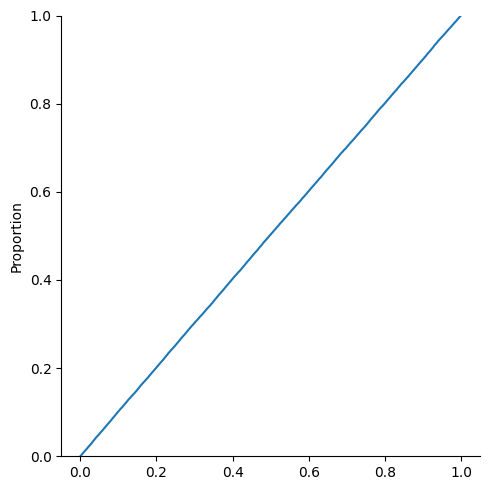

In [5]:
# Generate sorted random numbers
x = np.sort(np.random.random(size=100000))

# Plot the emperical CDF
sns.displot(x=x, kind="ecdf")


It appears that our random number generator is performing well.

Generating random numbers uniformly is one of the most frequently utilized techniques in random number generation. In fact, many other random generation methods are based on outputs from the uniform distribution. For instance, simulating "coin flips," where the outcome is either zero or one, can be achieved using this method:

In [11]:
# Generate 30 random numbers on uniform interval [0. 1]
x = np.random.random(size=30)

# Make them coin flips
heads = x > 0.5

# Show which were heads, and count the number of heads
print(heads)
print(f'\nThere were {np.sum(heads)} heads out of {len(x)} draws.')

[False False False  True  True False False False False False False False
  True  True  True False False  True  True  True False  True  True False
  True  True False False False False]

There were 12 heads out of 30 draws.


## Seeding Random Number Generators

To show that random number generation operates deterministically, we can seed the random number generator explicitly. Normally, generators are seeded with values like the current date/time to ensure uniqueness in the sequences produced.


By setting a specific seed, we can demonstrate that the same sequence of random numbers is produced each time.

In [21]:
# Seed the RNG
np.random.seed(42)

# Generate random numbers
numbers00 = np.random.random(size=10)
numbers00

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [24]:
# Re-seed the RNG
np.random.seed(42)

# Generate random numbers
numbers01 = np.random.random(size=10)
numbers01

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [25]:
numbers00 == numbers01

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

The random numbers are exactly the same. If we choose a different seed, we get a different sequence of numbers.

In [27]:
# Re-seed the RNG
np.random.seed(1802)

# Generate random numbers
numbers02 = np.random.random(size=10)
numbers02

array([0.86604775, 0.58409572, 0.67756477, 0.48096262, 0.19237137,
       0.41804616, 0.35736691, 0.69185675, 0.28587762, 0.49888831])

In [30]:
numbers02 == numbers01

array([False, False, False, False, False, False, False, False, False,
       False])

## Generating Random Numbers from Various Distributions

It is also possible to generate random numbers from different probability distributions. For instance, consider drawing random samples from a Normal distribution characterized by a mean (μ) and standard deviation (σ).

In [31]:
# Set parameters
mu = 10
sigma = 1

# Draw 10000 random samples
draws = np.random.normal(mu, sigma, size=10000)
draws

array([10.68076347, 11.8897269 ,  9.9319032 , ..., 12.09087873,
       10.60299266,  8.53821633])

Let's plot a histogram to visualize the genarated data distribution.

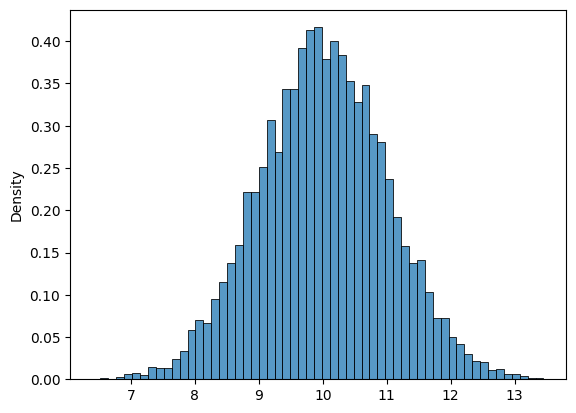

In [32]:
# Plot a histogram of our draws
sns.histplot(draws, stat="density");

Last week we covered Seaborn and discussed Matplotlib. To create the same distribution plot in Matplotlib, you can use this approach:

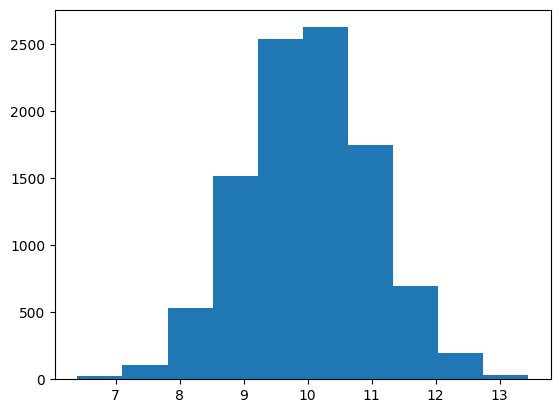

In [50]:
#Simplest approach
plt.hist(draws)
plt.show()

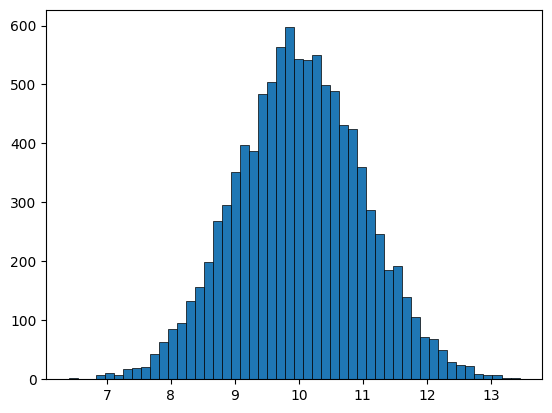

In [53]:
#Make it look nicer
plt.hist(draws, bins=50, edgecolor='black', linewidth=0.5)
plt.show()

Let's apply a test to compare our sampled distribution against a true normal distribution using the same μ value we used for sampling.

We will use a new library called SciPy, which contains many scientific and statistical tools for Python.

In [60]:
from scipy.stats import ttest_1samp

test_result = ttest_1samp(a=draws, popmean=mu) # Parameters: a = our sampled data, popmean = the expected mean we are comparing it to
test_result

TtestResult(statistic=np.float64(0.8656482587076136), pvalue=np.float64(0.3867038512759098), df=np.int64(9999))

In [61]:
p_val = test_result[1]
print(f"p-value={p_val:.3f}")

p-value=0.387


Since the p-value >= 0.05, we cannot conclude that the means are significantly different. (This result is expected since both samples come from the same distribution.)

## Generating Random Numbers from Discrete Distributions

Until now, our generated random numbers have been derived from continuous probability distributions. It is also possible to generate random numbers from discrete distributions. We have demonstrated this capability with the "coin flips" example, but it extends to other types of distributions. A common example involves selecting a random integer from a specified set. For instance, to randomly select one integer from the set `{0, 1, 2, 3}`, we can use the `np.random.randint()` function.

In [62]:
# Draw random integers on [0, 5), i.e., exclusive of last one.
np.random.randint(0, 5, 20)

array([4, 4, 1, 2, 2, 3, 4, 3, 3, 1, 4, 4, 0, 2, 2, 2, 2, 3, 2, 1])

For example, this can be used to generate random DNA sequences. 

Note that:

In [83]:
base = np.array(['A', 'T', 'G', 'C'])

base[0] #gives you 'A' as expected

np.str_('A')

Because `base` is a numpy array we can do this:

In [85]:
base[[0,0,3,2,1,0]]

array(['A', 'A', 'C', 'G', 'T', 'A'], dtype='<U1')

Knowing this we can now generate a random DNA sequence.

Let us see an example:

In [87]:
x = np.random.randint(0, 4, 50)
x

array([3, 1, 0, 3, 0, 0, 3, 1, 1, 2, 1, 3, 1, 3, 3, 0, 2, 0, 0, 2, 1, 0,
       2, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 0, 2, 3, 3, 1, 0, 2, 3, 2, 2, 1,
       0, 3, 2, 3, 2, 2])

In [89]:
dna_array = base[x]

In [91]:
#join the element together
''.join(dna_array)

'CTACAACTTGTCTCCAGAAGTAGCCTTTCTCCCAGCCTAGCGGTACGCGG'

## Selecting Elements from an Array Randomly

Randomly selecting elements from an array is a common task. The np.random.choice() function is specifically designed for this. Alternatively, you could achieve similar results using np.random.randint() by using the integers to represent indices in the array. However, `np.random.choice()` includes a useful keyword argument, `replace`, which allows you to specify whether to draw elements with or without replacement. For instance, if you have 100 samples and need to send only 20 to a testing facility, using `np.random.randint()` might lead to duplicate selections.

In [93]:
x = np.random.randint(0, 51, 20) # 20 random ints from 0-50
x

array([11, 32, 16,  5, 38, 47, 20,  1,  1,  5, 20,  9, 31, 30, 30, 16,  1,
       40,  6, 38])

In [99]:
np.unique_counts(x)

UniqueCountsResult(values=array([ 1,  5,  6,  9, 11, 16, 20, 30, 31, 32, 38, 40, 47]), counts=array([3, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1]))

In [111]:
import pandas as pd
df = pd.DataFrame(np.unique_counts(x),index=['values', 'counts']).T
df = df.set_index('values')
df = df.sort_values('counts', ascending=False)
df

,counts
values,
1,3
5,2
30,2
20,2
16,2
38,2
11,1
6,1
9,1


In [4]:
# Generate a synthetic dataset with easy separability
X, y = make_classification(
    n_samples=10000,      # Total number of samples
    n_features=2,        # Number of features (dimensions)
    n_informative=1,     # Number of informative features
    n_redundant=0,       # Number of redundant features
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0,            # Fraction of samples whose class is randomly exchanged
    class_sep=3,         # Separation between the classes
    hypercube=True,
    random_state=42
)


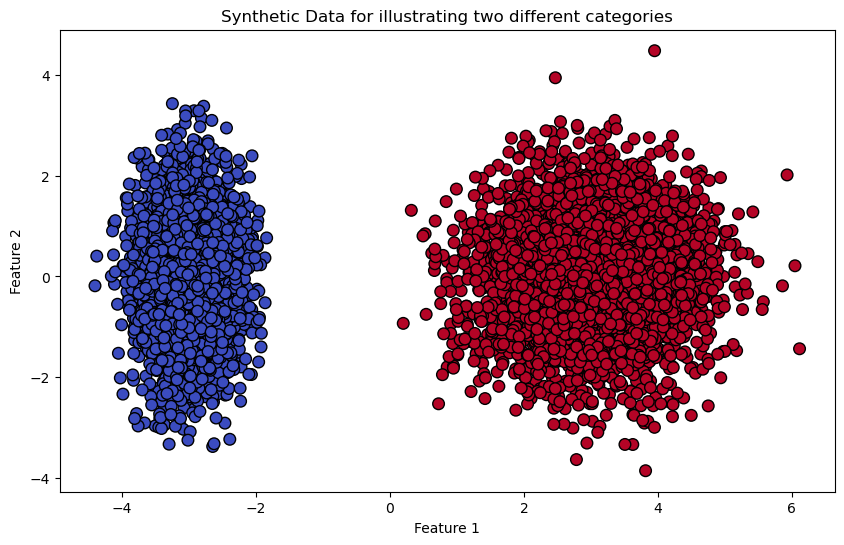

In [6]:
# Plot the generated dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', edgecolor='k', s=70)
plt.title("Synthetic Data for illustrating two different categories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# plt.legend()
plt.show()

In [8]:
Var1 = float(input("Please enter feature1 for an unknown point: "))
Var2 = float(input("Please enter feature2 for an unknown point: "))
print(Var1, Var2)
if(Var1 > -1.0):
    print("The new point belongs to group RED")
else:
    print("The new point belongs to group Blue")


-2.0 4.0
The new point belongs to group Blue
